[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/EramM805/AI-assignment-3/blob/main/Manasia_Assignment3.ipynb)


### Abstract

The dataset I chose to work with is about [life expectancy of the world](https://www.kaggle.com/amansaxena/lifeexpectancy). The data contains 223 rows with countries and their corresponding life expectancy rank, name, life expectancy overall as well as life expectancy of males and females and the continent the country is in. The data was scraped from [wikipedia](https://en.wikipedia.org/wiki/List_of_countries_by_life_expectancy#List_by_the_CIA_.282016.29). I was interested in this dataset mainly because life expectancy has been a topic discussed for several years especially recently because of covid. This data seemed to be a perfect dataset for both linear regression and classification which is why it was chosen. The dataset also has a usability score of 9.1 on kaggle which is higher than other datasets in the life expectancy topic. 

In the description of the dataset the original author Aman Saxena (@amansaxena on kaggle) mentions that we can do "classification by various techniques like SVM(linear), KNN, C.45 etc. and other supervised and unsupervised techniques." Using the author's suggestion linear support vector machines and k-nearest neighbor algorithms will be used for classificiation. Over the course of this notebook I hope to find whether male life expectancy is correlated to female life expectency. I will also be looking into whether we can successfully classify what continents each row in the dataset belongs in based on female and male life expectancy.



### Section 1: Regression Dataset Prep

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
from sklearn import datasets
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier

There are six columns in this dataset and 223 rows. The first column is the life expectancy rank which is based on the overall life expectancy. The datatype for rank is integer. The second column is the country name and the datatype is object as strings are objects in python. There are 233 unique values for the country column. The third column is the overall life expectancy which is a float. This column includes the life expectancy of both females and males. The next two columns are female and male life expectancy which are both floats. The last column is the continent the corresping country. The continents used in this dataset are: Africa, Asia, Oceania, North America, South America, and Europe.

Now we will load the dataset.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/EramM805/AI-assignment-3/main/data/Life_expectancy_dataset.csv", encoding='latin-1')
df.dtypes

Rank              int64
Country          object
Overall Life    float64
Male Life       float64
Female Life     float64
Continent        object
dtype: object

Next we will show the head of the data.

In [3]:
df.head()

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe


Looking at the head of the dataset we can see that Monaco a country in Europe seems to have the highest overall life expectancy of 89.5. The female life expectancy for all the rows in the head seem to be higher than male life expectancy which is an interesting observation. Also there are only two continents represented in the head which are Europe and Asia.

For regression we will only be using two columns, male and female life expectancy. Below, I use male life expectancy as the outcome or dependent variable. Because our data has only one feature ```reshape(-1, 1)``` is applied to provide a 2D array as per the documentation for sklearn linear regression.

I assume that there is a high correlation between the two but let's see if that is actually the case.

In [4]:
x_female = df["Female Life"]
y_male = df["Male Life"]
x_female = x_female.values.reshape(-1, 1)

### Section 2: Regression

First lets start with male being the outcome variable. Below we split the cleaned dataset using sklearn into a tratining and test set.

In [5]:
X_train_female, X_test_female, y_train_male, y_test_male = train_test_split(x_female, y_male, test_size=0.33, random_state = 42)


Next we fit a linear regresstion to our training set. 

In [6]:
reg = LinearRegression().fit(X_train_female, y_train_male)

Below the regressor with the training set is graphed. 

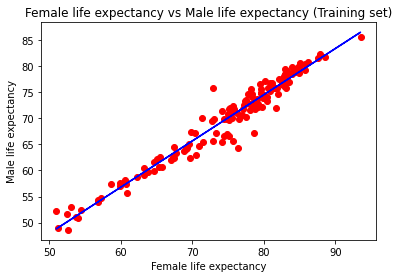

In [7]:
plt.scatter(X_train_female, y_train_male, color = 'red')
plt.plot(X_train_female, reg.predict(X_train_female), color = 'blue')
plt.title('Female life expectancy vs Male life expectancy (Training set)')
plt.xlabel('Female life expectancy')
plt.ylabel('Male life expectancy')
plt.show()

Next, the regressor with both the test and training data set is graphed. The red dots indicate that that specific point belongs to the training set and the green dots indicate that the specific point belongs to test dataset. The blue line is the regressor.

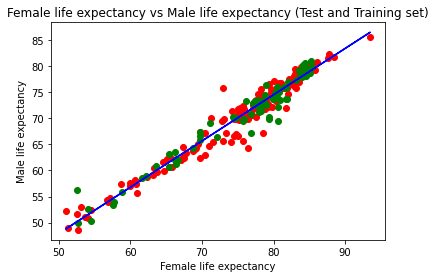

In [8]:
plt.scatter(X_train_female, y_train_male, color = 'red')
plt.scatter(X_test_female, y_test_male, color = 'green')
plt.plot(X_train_female, reg.predict(X_train_female), color = 'blue')
plt.title('Female life expectancy vs Male life expectancy (Test and Training set)')
plt.xlabel('Female life expectancy')
plt.ylabel('Male life expectancy')
plt.show()

To take a deeper look at the regressor, a graph is created with the prediction outcome. 

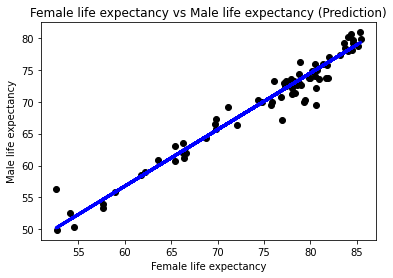

In [9]:
y_prediction_male = reg.predict(X_test_female)
plt.scatter(X_test_female, y_test_male,  color='black')
plt.plot(X_test_female, y_prediction_male, color='blue', linewidth=3)
plt.title('Female life expectancy vs Male life expectancy (Prediction)')
plt.xlabel('Female life expectancy')
plt.ylabel('Male life expectancy')
plt.show()

Looking at the graphs we can obersve that most of the data points fall on the regressor but let's confirm that with our error analysis. 

In [10]:
print("R2 score is: ", r2_score(y_test_male, y_prediction_male))

R2 score is:  0.9499434570091922


```r2_score``` is the coefficient of determination of the prediction. Since the score is 0.9554680133599146 where 1.0 is the best possible outcome, it can be determined that the linear regression does perform really well and that the data is highly correlated. However, there are other factors that need to be included for life expectancy other than gender and sexual identity such as vaccination availability, environment, genetics, and drug usage which is why the value is not 1.0. 

### Section 3: Classification Dataset Prep

The columns that are in this dataframe have already been discussed above and the dataset head has already been shown. The columns that will be used in the classification are:  
- Female life expectancy: Range is from 51 to 93.5
- Male life expectancy: Range is from 48.6 to 85.6
- Continents: Continents are Africa, Asia, Oceania, North America, South America, and Europe.

The continents will be mapped to the following set of integers:
- "Africa": 0
- "Asia":1 
- "Oceania":2
- "North America":3
- "South America":4
- "Europe":5

Next we will do the mapping of the continent column to integers. We will also extract female and male life expectancy from our dataframe so that we are only working with the three columns discussed above. No further cleaning is needed.

In [11]:
x = df[["Female Life", "Male Life"]]
def convertToInt(y):
    intMap = {"Africa": 0, "Asia":1 , "Oceania":2, "North America":3, "South America":4,  "Europe":5 }
    output = []
    for row in y:
        output.append(intMap[row])
    return output
y = np.array(convertToInt(df["Continent"]))

### Section 4: Classification

Two classification algorithms will be explored on this dataset. The first that will be discussed is linear support vector machines.

Below we split the cleaned dataset using sklearn into a training and test set.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33 , random_state = 42)

Next we fit a classifier to our training set

In [13]:
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.527027027027027

We can see above that the score of the classifier is only 0.527 which is much lower than our regressor score. The best possible score is 1.0 and we are only able to achieve half of that. This could be for multiple reasons. One reason could be unequal distribution of continent data, for example Asia would appear a lot more in the dataset than Oceania. Other reasons may include different environments within the same continent, and different financial stability levels need to be included as a attribute to succesfully classify.

Since SVM performed less than expected, I will now try another classification algorithm, KNN. Below I fit the KNN classifier to our dataset.

In [14]:
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

Next, I check the score:

In [15]:
neigh.score(X_test, y_test)

0.5540540540540541

Unfortunately, this also has a low score. Let's try using 1-5 neighbors instead of just 4 to see if that helps us.

In [16]:
for i in range(1, 6):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    print(f"Score with {i} neighbors: {neigh.score(X_test, y_test)}")

Score with 1 neighbors: 0.5
Score with 2 neighbors: 0.4594594594594595
Score with 3 neighbors: 0.44594594594594594
Score with 4 neighbors: 0.5540540540540541
Score with 5 neighbors: 0.5540540540540541


We can see that it doesn't really help in our case. Unfortunately our maximum score still remains low (0.554). This could be because for the same reasons that we had for the SVM classifier. To repeat: 
```One reason could be unequal distribution of continent data, for example Asia would appear a lot more in the dataset than Oceania. Other reasons may include different environments within the same continent, and different financial stability levels.```

I had to do a lot of research to see how I can visualize the decision surface of our classifier. I stumbled upon [this stackoverflow post](https://stackoverflow.com/questions/51495819/how-to-plot-svm-decision-boundary-in-sklearn-python) where the answer from @seralouk helped me visualize. Below is an attempt to visualize both:

No handles with labels found to put in legend.


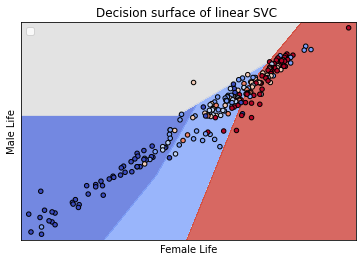

In [17]:
#NOTE: THE FOLLOWING CODE HAS BEEN RETRIEVED FROM : https://stackoverflow.com/questions/51495819/how-to-plot-svm-decision-boundary-in-sklearn-python
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = df["Female Life"], df["Male Life"]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('Male Life')
ax.set_xlabel('Female Life')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

Next let's move on to using the K-nearest neighbor algorithm. 

In [18]:
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [19]:
neigh.score(X_test, y_test)

0.5540540540540541

In [ ]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy
def plot_contours(ax, neigh, xx, yy, **params):
    Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of K-NN')
# Set-up grid for plotting.
X0, X1 = df["Female Life"], df["Male Life"]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, neigh, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('Male Life')
ax.set_xlabel('Female Life')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

### Conclusions

In my report I performed a linear regression to see if there is a correlation between female and life expectancy. using the sklearn library. The linear regression model had a r2 score of ~0.95 which showed that there is a high correlation between female and male life expectancy. It was interesting to prove that they are highly correlated but also realize that there are other factors that go into life expectancy that is not represented in this dataset. If I could extend the linear regression part of this project further I would find more attributes such as healthcare quality or food produce quality to see the relationship between these variables and life expectancy.

I also performed two classification algorithms, SVM and KNN to see if given female and male life expectancy can we successfully predict what continent that data point belongs to. Both models had a low r2 score of ~0.55. This could be for many reasons including unequal data distribution. It was interesting to find different algorithms to use for this part of the project as SVM had failed the first time. If I could extend this project further I would attempt to find a classification model that successfully could classify data points to continents.